Estimated 3D structure:
 [[ 1.14356999e+00  9.88642975e-02  1.98888902e+00]
 [-4.04948921e-02  4.24709199e-01  5.93104458e-01]
 [ 3.56015611e-01  2.88474029e-01  1.02483217e+00]
 [ 1.86414005e-02  5.36994854e-01  5.86799725e-01]
 [ 2.86631603e-02  2.13568533e-01  4.72690115e-01]
 [ 1.62204948e+00  5.31544980e-01  2.18348518e+00]
 [ 3.34644736e-01  1.62684669e-01  1.32336023e+00]
 [ 1.42700567e-01  2.56223377e-01  9.70098366e-01]
 [-7.57080316e-02  2.44527423e-01  2.88108851e-01]
 [-2.18187433e-03  5.20751400e-03  3.59667278e-03]]


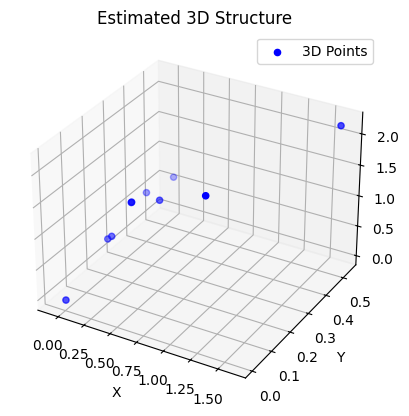

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to estimate 3D structure from two views given essential matrix
def estimate_3d_structure(E, points1, points2, K):
    # Decompose essential matrix into rotation and translation
    _, R, t, _ = cv2.recoverPose(E, points1, points2, K)

    # Triangulate points
    P1 = np.hstack((np.eye(3), np.zeros((3, 1)))) # First camera matrix
    P2 = np.hstack((R, t)) # Second camera matrix with R, t
    P1 = K @ P1
    P2 = K @ P2
    points_4d_hom = cv2.triangulatePoints(P1, P2, points1.T, points2.T)
    points_3d = points_4d_hom[:3] / points_4d_hom[3]  # Convert homogeneous to 3D

    return points_3d.T

# Simulated example
K = np.eye(3)  # Intrinsic camera matrix
E = np.eye(3)  # Essential matrix for simulated data
points1 = np.random.rand(10, 2)  # Points in the first image
points2 = np.random.rand(10, 2)  # Corresponding points in the second image

# Estimate 3D structure
structure_3d = estimate_3d_structure(E, points1, points2, K)
print("Estimated 3D structure:\n", structure_3d)

# Plotting the estimated 3D structure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the 3D points
ax.scatter(structure_3d[:, 0], structure_3d[:, 1], structure_3d[:, 2], c='b', marker='o', label='3D Points')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Estimated 3D Structure')

# Show legend
ax.legend()

# Display the plot
plt.show()